# Analysis of Oil prices (Crude-Oil-Prices-West-Texas-Intermediate-WTI-Cushing-Oklahoma)

This notebook shows an analysis of oil prices over the years 2009 to 2019.
We will analyse these prices and try to find patterns from it. 

We will first preprocess the dataset to match our needs, then create a function to which we can pass a percent change in price and it will give us, all the dates where similar percent change was occured.

In [1]:
# Packages for analysing the dataset
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from seaborn import set_style
set_style('darkgrid')

## 1. Preprocessing

First we will load the dataset in a pandas dataframe, to perform the preprocessing on it. 

As we are a little aware of our dataset, we will make the `DATE` column as out index column.

In [2]:
df = pd.read_csv('DCOILWTICO.csv', index_col=[0])
df.head()

,DCOILWTICO
DATE,
2009-11-12,77.25
2009-11-13,76.34
2009-11-16,78.91
2009-11-17,79.08
2009-11-18,79.55


Now that we have loaded the dataframe, let's convert the `DATE` column to datetime format, so that it'll be easier for use to analyse it further.

In [3]:
df.index = pd.to_datetime(df.index)
df.head(15).T

DATE,2009-11-12,2009-11-13,2009-11-16,2009-11-17,2009-11-18,2009-11-19,2009-11-20,2009-11-23,2009-11-24,2009-11-25,2009-11-26,2009-11-27,2009-11-30,2009-12-01,2009-12-02
DCOILWTICO,77.25,76.34,78.91,79.08,79.55,77.47,76.83,76.49,74.88,77.25,.,75.95,77.19,78.39,76.62


In [4]:
df.dtypes

DCOILWTICO    object
dtype: object

By looking at first 15 rows, we can see there is a value `.` which needs to be removed from the prices column, and convert the prices to `float` data type.

In [5]:
df['DCOILWTICO'] = df['DCOILWTICO'][df['DCOILWTICO'] != '.'].astype('float32')

Now, we'll check for `NaN` values and drop them from the dataframe

In [6]:
df.isna().sum()

DCOILWTICO    94
dtype: int64

In [7]:
df.dropna(inplace=True)

As the dataset is pretty much cleaned, let's plot it to see the variations in prices over the years.

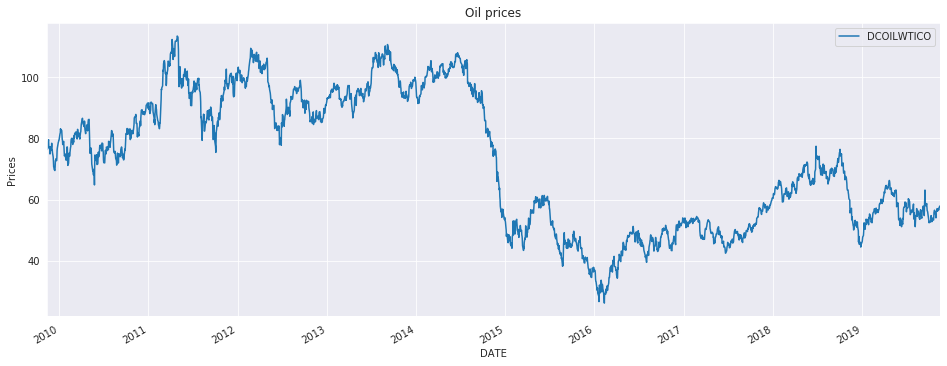

In [8]:
df.plot(figsize=(16,6))
plt.title('Oil prices')
plt.ylabel('Prices')
plt.show()

As per the requirements, we need to find the difference between consecuative price values and their percent change, let's add these values as new columns called, `Difference` and `Perc_diff`

## 2. Feature generation

In [9]:
df['Difference'] = df['DCOILWTICO'].diff(periods=1)
df['Perc_diff'] = df['DCOILWTICO'].pct_change(periods=1) * 100
df.fillna(0, inplace=True)
df.head()

,DCOILWTICO,Difference,Perc_diff
DATE,,,
2009-11-12,77.250000,0.000000,0.000000
2009-11-13,76.339996,-0.910004,-1.177996
2009-11-16,78.910004,2.570007,3.366530
2009-11-17,79.080002,0.169998,0.215435
2009-11-18,79.550003,0.470001,0.594342


Now, we have got the required difference and precent change values, let's extract few other features from the dataset, so that it'll be easier for us to get the range of similar percent change values. 

We'll add more columns for `Daily`, `Weekly`, `Monthly`, `Yearly`, and so on.

In [10]:
df['Day'] = pd.to_datetime(df.index).day
df['Month'] = pd.to_datetime(df.index).month
df['Weekday'] = pd.to_datetime(df.index).dayofweek
df['Year'] = pd.to_datetime(df.index).year
df.head()

,DCOILWTICO,Difference,Perc_diff,Day,Month,Weekday,Year
DATE,,,,,,,
2009-11-12,77.250000,0.000000,0.000000,12,11,3,2009
2009-11-13,76.339996,-0.910004,-1.177996,13,11,4,2009
2009-11-16,78.910004,2.570007,3.366530,16,11,0,2009
2009-11-17,79.080002,0.169998,0.215435,17,11,1,2009
2009-11-18,79.550003,0.470001,0.594342,18,11,2,2009


As we can see the final dataframe above, now we can work on getting similar percent change values over a period of range

## 3. Analysis

First let's try to find all the dates where we specify a `Weekday`(Ranging from 0 to 4, where `0 is Monday`, `1 is Tuesday`, and so on) and `Perc_diff` over a period of time.

In [11]:
start_date = '2009-11-01'
end_date = '2019-11-18'
percent_change = 0.1
weekday = 0  # 0 to 4 (Monday to Friday)
df.loc[(df['Perc_diff'] > percent_change) & (df['Weekday'] == weekday)][start_date:end_date]

,DCOILWTICO,Difference,Perc_diff,Day,Month,Weekday,Year
DATE,,,,,,,
2009-11-16,78.910004,2.570007,3.366530,16,11,0,2009
2009-11-30,77.190002,1.240005,1.632655,30,11,0,2009
2009-12-28,78.669998,1.839996,2.394891,28,12,0,2009
2010-01-04,81.519997,2.129997,2.682960,4,1,0,2010
2010-01-25,74.900002,0.650002,0.875425,25,1,0,2010
...,...,...,...,...,...,...,...
2019-08-19,56.240002,1.410000,2.571583,19,8,0,2019
2019-09-09,57.880001,1.430000,2.533221,9,9,0,2019
2019-09-16,63.099998,8.340000,15.230095,16,9,0,2019
